In [ ]:
pip install pycaret[full]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 34.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This c

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = '/content/drive/My Drive/Datamining/groceriesdataset.csv'
data = pd.read_csv(file_path)

data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,MemberNo,TimeStamp,item
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MemberNo   38765 non-null  int64 
 1   TimeStamp  38765 non-null  object
 2   item       38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None


In [ ]:
data.shape


(38765, 3)

In [ ]:
data.isnull().any()


,0
MemberNo,False
TimeStamp,False
item,False


In [ ]:
all_products = data['item'].unique()
print("Total products: {}".format(len(all_products)))

Total products: 167


In [ ]:
!pip install mlxtend


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
basket = data.groupby(['MemberNo', 'item']).sum().unstack().reset_index().fillna(0)

basket.head()


MemberNo             TimeStamp                            \
item          Instant food products UHT-milk abrasive cleaner   
0        1000                     0        0                0   
1        1001                     0        0                0   
2        1002                     0        0                0   
3        1003                     0        0                0   
4        1004                     0        0                0   

                                                                          \
item artif. sweetener baby cosmetics bags baking powder bathroom cleaner   
0                   0              0    0             0                0   
1                   0              0    0             0                0   
2                   0              0    0             0                0   
3                   0              0    0             0                0   
4                   0              0    0             0                0   

                  ...                                                   \
item        beef  ... turkey vinegar waffles whipped/sour cream whisky   
0              0  ...      0       0       0                  0      0   
1     14-04-2015  ...      0       0       0         20-01-2015      0   
2              0  ...      0       0       0                  0      0   
3              0  ...      0       0       0                  0      0   
4              0  ...      0       0       0                  0      0   

                                                                         \
item white bread white wine                      whole milk      yogurt   
0              0          0            15-03-201524-06-2014  15-03-2015   
1     14-04-2015          0            12-12-201407-02-2014           0   
2              0          0                      26-04-2014           0   
3              0          0                               0           0   
4              0          0  13-10-201404-02-201419-08-2014           0   

               
item zwieback  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 168 columns]

In [ ]:
basket = data.groupby(['MemberNo', 'item'])['item'].count().unstack().reset_index().fillna(0)
basket.set_index('MemberNo', inplace=True)
# Grouping the data created a binary matrix (1 if the item was bought, 0 if not)



# Convert counts to 1s and 0s
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Display the resulting binary matrix
basket.head()


item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
MemberNo,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)
frequent_itemsets.head()# Display the frequent itemsets

,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.062083,(beverages)
4,0.158799,(bottled beer)


In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)# Generating the association rules

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(other vegetables),0.119548,0.376603,0.050795,0.424893,1.128223,0.005773,1.083966,0.129082
1,(other vegetables),(beef),0.376603,0.119548,0.050795,0.134877,1.128223,0.005773,1.017719,0.182309
2,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
3,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,0.009360,1.023754,0.269364
4,(other vegetables),(bottled beer),0.376603,0.158799,0.068497,0.181880,1.145345,0.008692,1.028212,0.203563


In [ ]:
filtered_rules = rules[(rules['lift'] > 1) & (rules['confidence'] > 0.5)]
filtered_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
10,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297
22,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
30,(brown bread),(whole milk),0.135967,0.458184,0.069779,0.513208,1.120091,0.007481,1.113034,0.124087
34,(butter),(whole milk),0.126475,0.458184,0.066188,0.523327,1.142176,0.008239,1.136661,0.142501


## **VISUALIZATION**

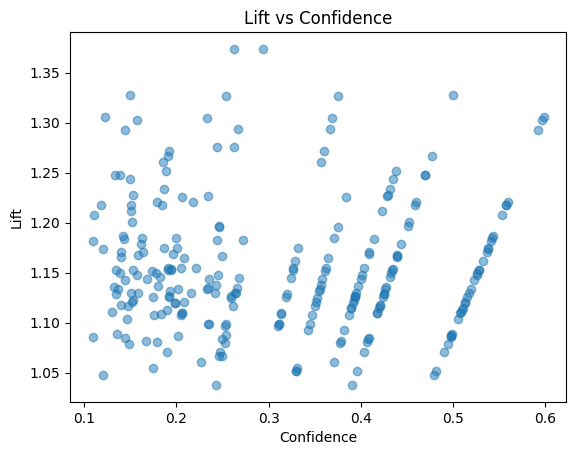

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Lift vs Confidence')
plt.show()


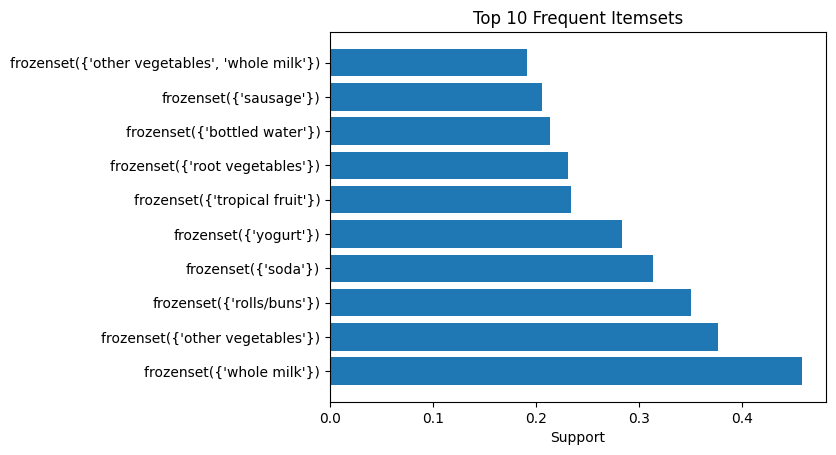

In [ ]:
top_itemsets = frequent_itemsets.nlargest(10, 'support')

plt.barh(top_itemsets['itemsets'].astype(str), top_itemsets['support'])
plt.xlabel('Support')
plt.title('Top 10 Frequent Itemsets')
plt.show()


In [ ]:
!pip install networkx


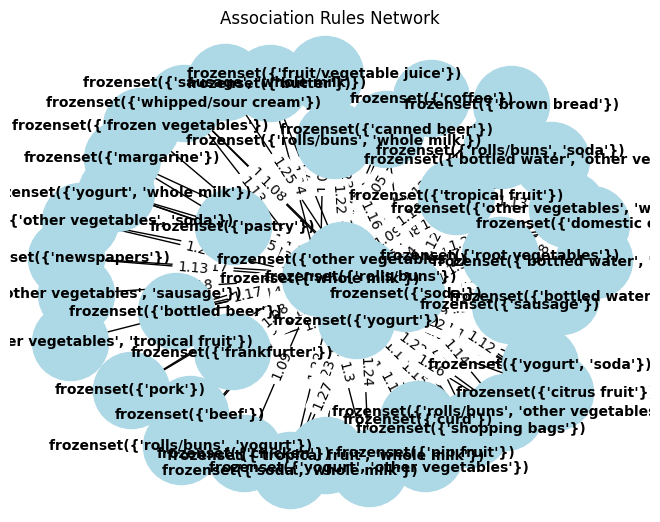

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add all unique antecedents and consequents to the graph
for rule in rules.to_dict('records'):
    G.add_node(rule['antecedents'])
    G.add_node(rule['consequents'])

# Add edges based on rules
for rule in rules.to_dict('records'):
    G.add_edge(rule['antecedents'], rule['consequents'], weight=rule['lift'])

# Define positions for the nodes
pos = nx.spring_layout(G, k=1.5)

# Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')

# Draw the edge labels with the 'lift' values
edge_labels = {(rule['antecedents'], rule['consequents']): round(rule['lift'], 2) for rule in rules.to_dict('records')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the plot
plt.title('Association Rules Network')
plt.show()


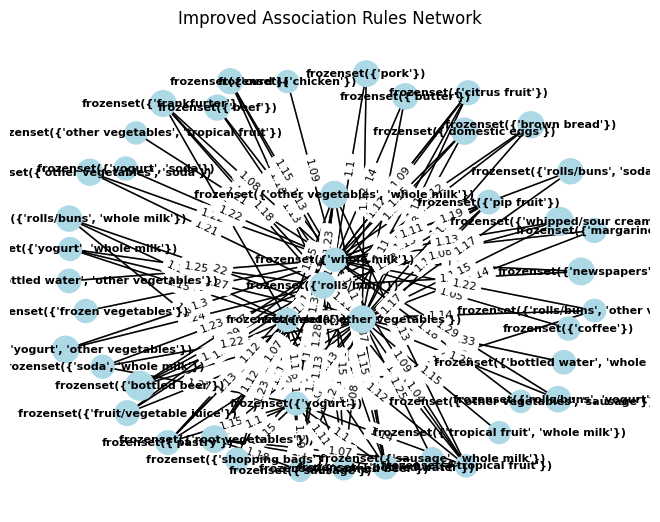

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes and edges based on rules
for rule in rules.to_dict('records'):
    G.add_node(frozenset(rule['antecedents']), size=rule['support'])  # Use 'support' for node size
    G.add_node(frozenset(rule['consequents']), size=rule['support'])
    G.add_edge(frozenset(rule['antecedents']), frozenset(rule['consequents']), weight=rule['lift'])

# Define a layout with more space between nodes
pos = nx.spring_layout(G, k=2, iterations=50)

# Ensure node sizes are proportional to support, fetching them based on the node keys
node_sizes = [5000 * G.nodes[node]['size'] for node in G.nodes]  # Adjust multiplier to scale node sizes

# Draw nodes with size proportional to 'support'
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='lightblue', font_size=8, font_weight='bold')

# Draw the edges with thickness proportional to 'lift'
edge_weights = [G[u][v]['weight'] for u, v in G.edges]
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5)

# Draw the edge labels (optional: make them smaller)
edge_labels = {(frozenset(rule['antecedents']), frozenset(rule['consequents'])): round(rule['lift'], 2) for rule in rules.to_dict('records')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the plot
plt.title('Improved Association Rules Network')
plt.show()


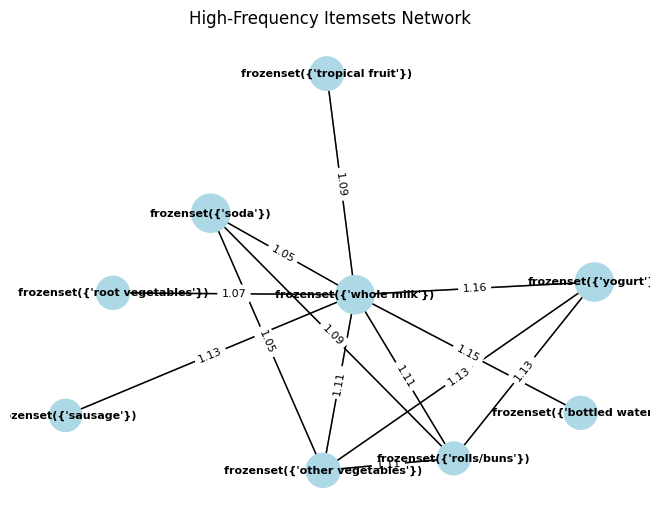

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define a threshold for high-frequency items
support_threshold = 0.1  # You can adjust this threshold value based on your preference

# Filter the rules based on the support threshold
high_freq_rules = [rule for rule in rules.to_dict('records') if rule['support'] > support_threshold]

# Create a graph
G = nx.Graph()

# Add nodes and edges based on the filtered high-frequency rules
for rule in high_freq_rules:
    G.add_node(frozenset(rule['antecedents']), size=rule['support'])  # Use 'support' for node size
    G.add_node(frozenset(rule['consequents']), size=rule['support'])
    G.add_edge(frozenset(rule['antecedents']), frozenset(rule['consequents']), weight=rule['lift'])

# Define a layout with more space between nodes
pos = nx.spring_layout(G, k=2, iterations=50)

# Ensure node sizes are proportional to support, fetching them based on the node keys
node_sizes = [5000 * G.nodes[node]['size'] for node in G.nodes]  # Adjust multiplier to scale node sizes

# Draw nodes with size proportional to 'support'
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='lightblue', font_size=8, font_weight='bold')

# Draw the edges with thickness proportional to 'lift'
edge_weights = [G[u][v]['weight'] for u, v in G.edges]
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5)

# Draw the edge labels (optional: make them smaller)
edge_labels = {(frozenset(rule['antecedents']), frozenset(rule['consequents'])): round(rule['lift'], 2) for rule in high_freq_rules}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the plot
plt.title('High-Frequency Itemsets Network')
plt.show()


In [ ]:
!pip install seaborn


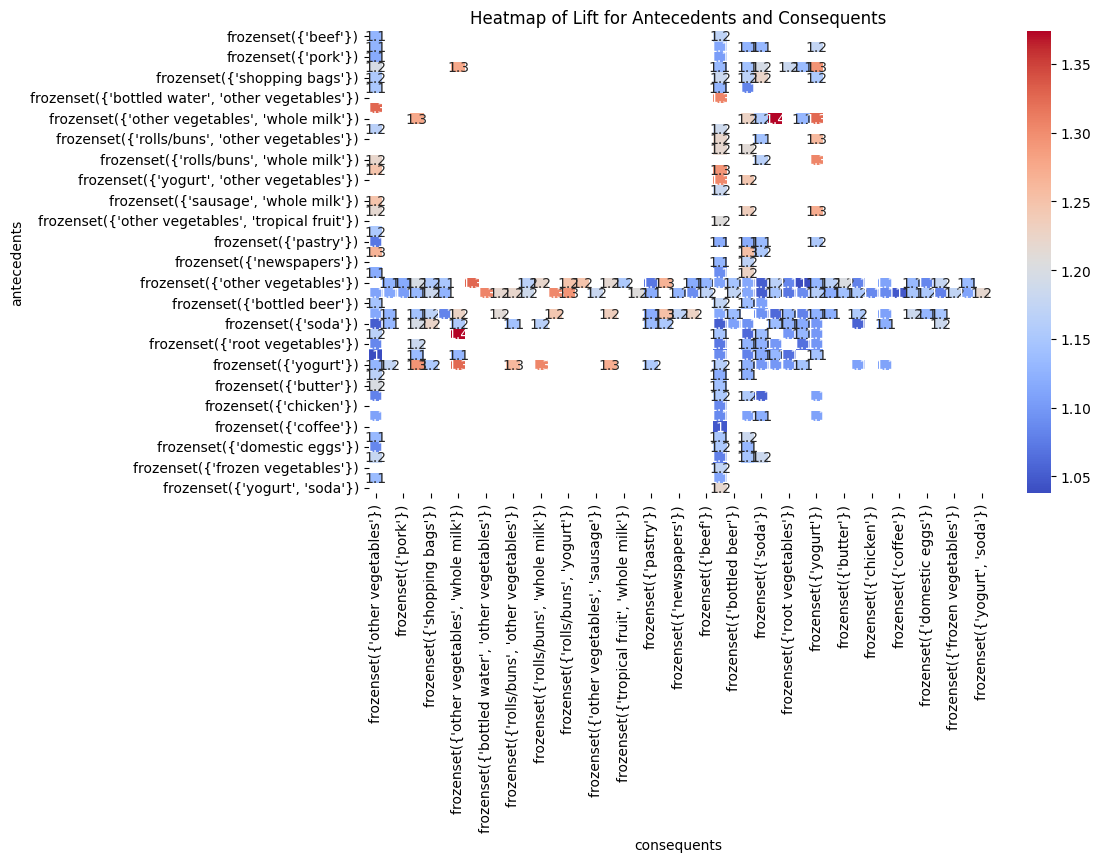

In [ ]:
import seaborn as sns

heatmap_data = rules.pivot_table(index='antecedents', columns='consequents', values='lift')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Heatmap of Lift for Antecedents and Consequents')
plt.show()


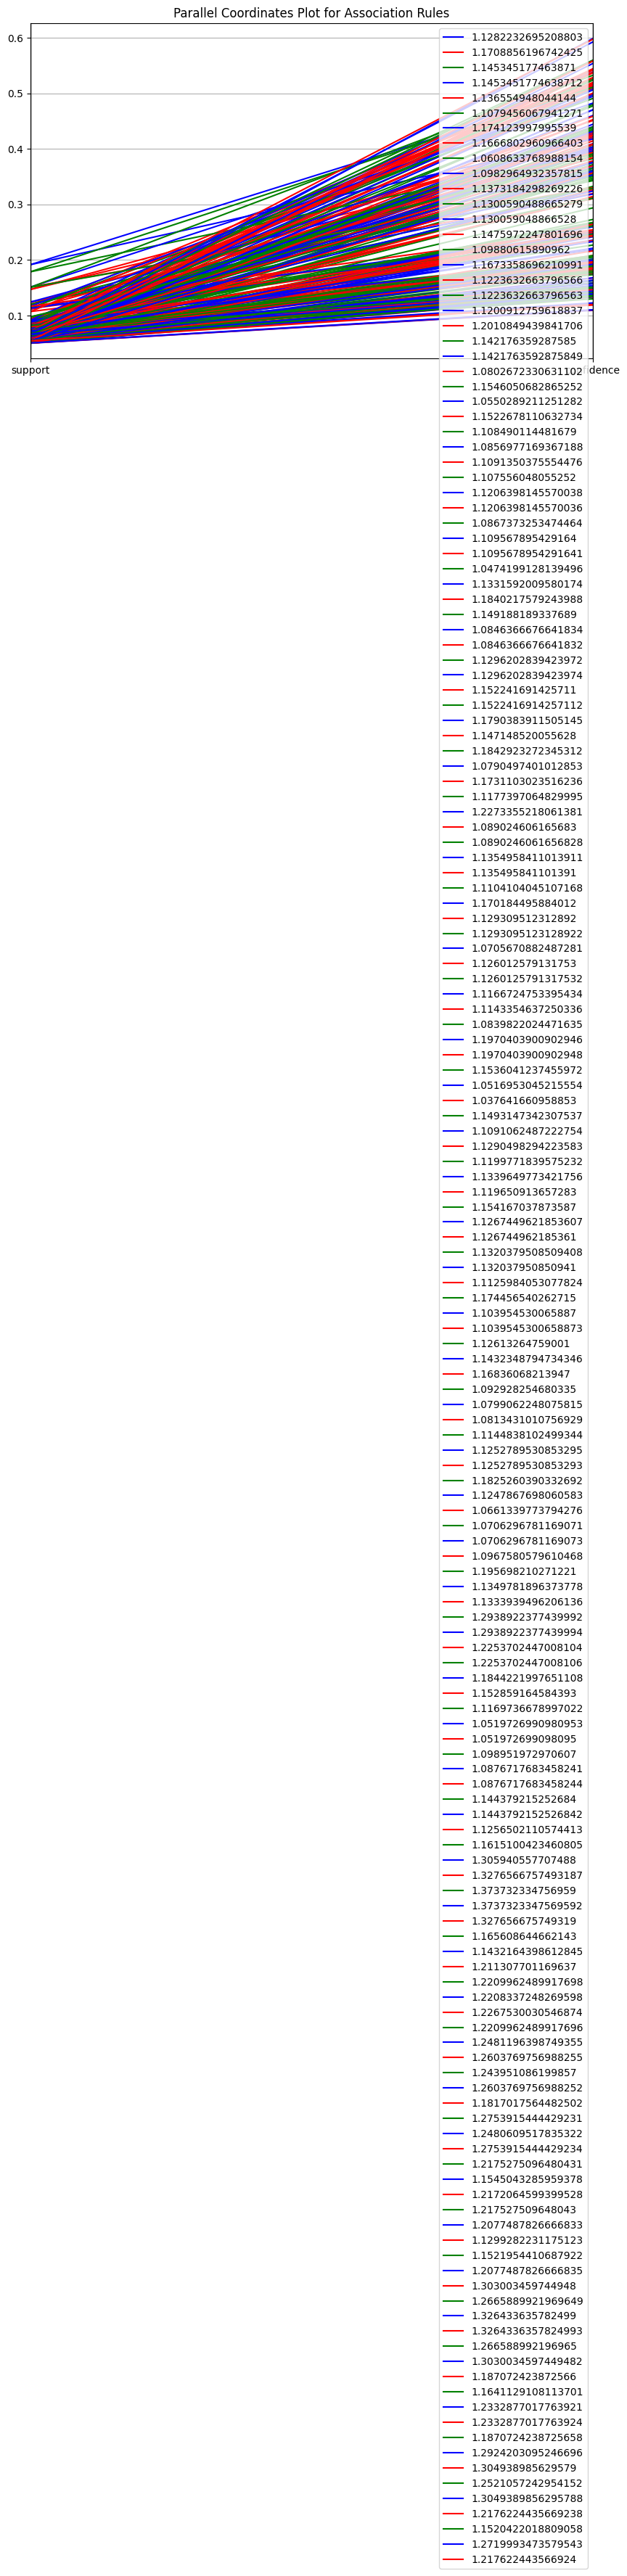

In [ ]:
from pandas.plotting import parallel_coordinates

# Select relevant columns
rules_subset = rules[['support', 'confidence', 'lift']]

# Create a parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(rules_subset, class_column='lift', color=['b', 'r', 'g'])
plt.title('Parallel Coordinates Plot for Association Rules')
plt.show()
